# Gaussian Process
A Gaussian process (GP) is a process used to fit data. By definition, it is a time continuous stochastic process $\left\{X_{t};t\in T\right\}$ that for every finite set of indices $t_{1},\ldots ,t_{k}$ in the index set $T$, $${\displaystyle \mathbf {X} _{t_{1},\ldots ,t_{k}}=(X_{t_{1}},\ldots ,X_{t_{k}})}$$ is a multivariate Gaussian random variable. One of the benifit of using a GP is that they are not parameter models and does not require any gradient information to do regressions. The only hyperparameter of a noise-free GP is a kernel, which determins what will the fitting curve be like.   
   
In this Notebook, we will look at different parts of a Gaussian process, the fundamental theroems behind them, and how to code a GP.

## 1. Multivariate Gaussian Distribution
A random variable (vector) $\mathbf {x}$ sampled from a multivariate Gaussian distribution ${\displaystyle {\mathcal {N}}({\boldsymbol {\mu }},\,{\boldsymbol {\Sigma }})}$ has a probability density function of the shape: $${\displaystyle P(\mathbf {x})={\frac {1}{\sqrt {(2\pi )^{k}|{\boldsymbol {\Sigma }}|}}}\mathrm {e} ^{-{\frac {1}{2}}({\mathbf {x} }-{\boldsymbol {\mu }})^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}({\mathbf {x} }-{\boldsymbol {\mu }})},}$$ where vector $\boldsymbol {\mu }$ is the mean and $\boldsymbol {\Sigma }$ is the covariance matrix.   
   
The covariance matrix $\boldsymbol {\Sigma }$ is defined by: $${\displaystyle \operatorname {\boldsymbol {\Sigma }} _{X_{i}X_{j}}=\operatorname {cov} [X_{i},X_{j}]=\operatorname {E} [(X_{i}-\operatorname {E} [X_{i}])(X_{j}-\operatorname {E} [X_{j}])]}$$ or in block matrix form: $$\boldsymbol {\Sigma }=
\begin{bmatrix}
 \mathrm{E}[(X_1 - \mu_1)(X_1 - \mu_1)] & \mathrm{E}[(X_1 - \mu_1)(X_2 - \mu_2)] & \cdots & \mathrm{E}[(X_1 - \mu_1)(X_n - \mu_n)] \\ \\
 \mathrm{E}[(X_2 - \mu_2)(X_1 - \mu_1)] & \mathrm{E}[(X_2 - \mu_2)(X_2 - \mu_2)] & \cdots & \mathrm{E}[(X_2 - \mu_2)(X_n - \mu_n)] \\ \\
 \vdots & \vdots & \ddots & \vdots \\ \\
 \mathrm{E}[(X_n - \mu_n)(X_1 - \mu_1)] & \mathrm{E}[(X_n - \mu_n)(X_2 - \mu_2)] & \cdots & \mathrm{E}[(X_n - \mu_n)(X_n - \mu_n)]
\end{bmatrix}$$    
From above we can see that the (i, j) element of $\boldsymbol {\Sigma }$ represents the covarience between the i-th and j-th element of the random variable (vector) $\mathbf {X}$    
       
### Properties:
1. A **standard** (n-dimensional) multivariate Gaussian distribution has covariance matrix equal to the identity matrix $$I_{1}={\begin{bmatrix}1\end{bmatrix}},\ I_{2}={\begin{bmatrix}1&0\\0&1\end{bmatrix}},\ I_{3}={\begin{bmatrix}1&0&0\\0&1&0\\0&0&1\end{bmatrix}},\ \cdots ,\ I_{n}={\begin{bmatrix}1&0&\cdots &0\\0&1&\cdots &0\\\vdots &\vdots &\ddots &\vdots \\0&0&\cdots &1\end{bmatrix}}$$    
and mean equal to $\boldsymbol {0 }$. By definition of the covariance matrix, each element of the random variable ${\displaystyle \mathbf {X} \ \sim \ {\mathcal {N}}({\boldsymbol {0}},\,{\boldsymbol {I}})}$ are independent. Thus ${\displaystyle X_{i}\sim \ {\mathcal {N}}(0,1)}$ for all ${\displaystyle i=1\ldots n}$.     
2. Recall that a random variable ${\displaystyle X' \ \sim \ {\mathcal {N}}({\mu},\,{\sigma}^2)}$ can be expressed in ters of ${\displaystyle X \ \sim \ {\mathcal {N}}({0},\,{1})}$ as:  
$$X' = {\sigma}X + {\mu}$$   
The similar property applies on multivariable Gaussian. Let ${\displaystyle \mathbf {Z} \ \sim \ {\mathcal {N}}({\boldsymbol {0}},\,{\boldsymbol {I}})}$. Then ${\displaystyle \mathbf {Z} \ \sim \ {\mathcal {N}}({\boldsymbol {\mu}},\,{\boldsymbol {\Sigma}})}$ can be represented as: 
$$\mathbf {X} = \mathbf {A}\mathbf {Z} + {\boldsymbol {\mu}},$$    
where $\mathbf {A}$ is the Cholesky decomposition of ${\boldsymbol {\Sigma}}$: 
$${\displaystyle {\boldsymbol {\Sigma }}={\boldsymbol {A}}{\boldsymbol {A}}^{\mathrm {T} }}$$  
Look [here](https://en.wikipedia.org/wiki/Cholesky_decomposition) for more information about Cholesky decomposition.   
3. It is possible to calculate the conditional probability distribution of a set of elements of a multivariate Gaussian random variable given the complementary set of elements from the same variable. If N-dimensional multivariate Gaussian random variable $\mathrm {x}$ is partitioned as follows:  $$
{\mathbf  {x}}={\begin{bmatrix}{\mathbf  {x}}_{1}\\{\mathbf  {x}}_{2}\end{bmatrix}}{\text{ with sizes }}{\begin{bmatrix}q\times 1\\(N-q)\times 1\end{bmatrix}}$$    
and accordingly $\boldsymbol {\mu}$ and $\boldsymbol {\Sigma}$ are partitioned as follows:  $$
\boldsymbol\mu
=
\begin{bmatrix}
 \boldsymbol\mu_1 \\
 \boldsymbol\mu_2
\end{bmatrix}
\text{ with sizes }\begin{bmatrix} q \times 1 \\ (N-q) \times 1 \end{bmatrix}$$    
$$
\boldsymbol\Sigma
=
\begin{bmatrix}
 \boldsymbol\Sigma_{11} & \boldsymbol\Sigma_{12} \\
 \boldsymbol\Sigma_{21} & \boldsymbol\Sigma_{22}
\end{bmatrix}
\text{ with sizes }\begin{bmatrix} q \times q & q \times (N-q) \\ (N-q) \times q & (N-q) \times (N-q) \end{bmatrix}$$    
then the distribution of $\mathrm {x_1}$ conditional on $\mathrm {x_2}$ is multivariate Gaussian $\mathrm {x_1}|\mathrm {x_2} \ \sim \ {\mathcal {N}}({\boldsymbol {\mu_{1|2}}},\,{\boldsymbol {\Sigma_{1|2}}}))$ where     
$$
{\boldsymbol{\mu_{1|2}}}
=
\boldsymbol\mu_1 + \boldsymbol\Sigma_{12} \boldsymbol\Sigma_{22}^{-1}
\left(
 \mathbf{x_2} - \boldsymbol\mu_2
\right)$$     
$$ 
{\displaystyle {{\boldsymbol{\Sigma_{1|2}}}}}={\boldsymbol {\Sigma }}_{11}-{\boldsymbol {\Sigma }}_{12}{\boldsymbol {\Sigma }}_{22}^{-1}{\boldsymbol {\Sigma }}_{21}.$$   
and the distribution of $\mathrm {x_2}$ conditional on $\mathrm {x_1}$ is multivariate Gaussian $\mathrm {x_2}|\mathrm {x_1} \ \sim \ {\mathcal {N}}({\boldsymbol {\mu_{2|1}}},\,{\boldsymbol {\Sigma_{2|1}}}))$ where     
$$
{\boldsymbol{\mu_{2|1}}}
=
\boldsymbol\mu_2 + \boldsymbol\Sigma_{21} \boldsymbol\Sigma_{11}^{-1}
\left(
 \mathbf{x_1} - \boldsymbol\mu_1
\right)$$       
$$ 
{\displaystyle {{\boldsymbol{\Sigma_{2|1}}}}}={\boldsymbol {\Sigma }}_{22}-{\boldsymbol {\Sigma }}_{21}{\boldsymbol {\Sigma }}_{11}^{-1}{\boldsymbol {\Sigma }}_{12}.$$ 

A proof can be found [here](https://statproofbook.github.io/P/mvn-cond.html)     
     
Below is the code exaple for multivariable Gaussian distribution.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as plt_patches

1000 points sampled from **standard multivariable Gaussian**

In [128]:
z1 = np.random.normal(0, 1, 1000)
z2 = np.random.normal(0, 1, 1000)
Z = np.array([[z1[i], z2[i]] for i in range(1000)])

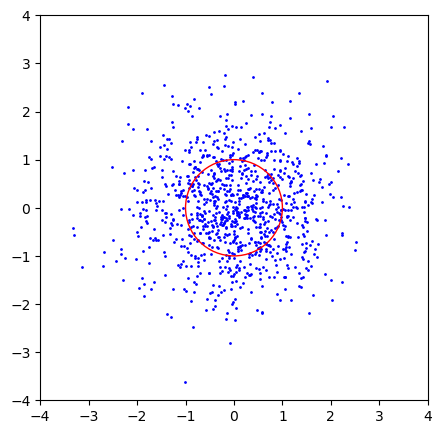

In [129]:
f, axes = plt.subplots()
f.set_figwidth(5)
f.set_figheight(5)
plt.xlim((-4,4))
plt.ylim((-4,4))

plt.scatter(z1, z2, s=1, c='blue')

std_circle = plt.Circle((0,0), 1, fill=False, color='red')
axes.add_artist(std_circle)
plt.show()

Generate arbitrary multivariated Gaussian distribution from standard multivariate Gaussian distribution

In [229]:
mu = np.array([1, 2])
cov = np.array([[1, 0.6],[0.6, 1]])
L = np.linalg.cholesky(cov)
X = np.array([np.matmul(L, Z[i]) for i in range(1000)]) + mu

x1 = [x[0] for x in X]
x2 = [x[1] for x in X]

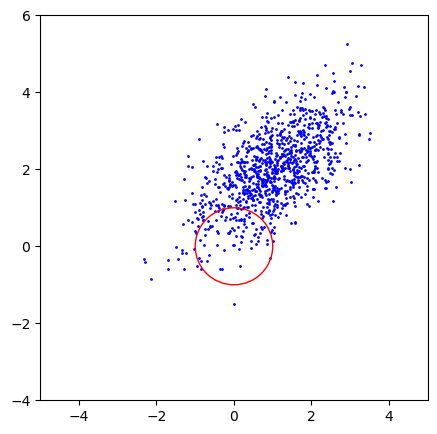

the red circle represents the standard deviation of Z


In [230]:
f, axes = plt.subplots()
f.set_figwidth(5)
f.set_figheight(5)
plt.xlim((-5,5))
plt.ylim((-4,6))

plt.scatter(x1, x2, s=1, c='blue')

std_circle = plt.Circle((0,0), 1, fill=False, color='red')
axes.add_artist(std_circle)
plt.show()
print("the red circle represents the standard deviation of Z")

The plot below compares the samples from both distribution

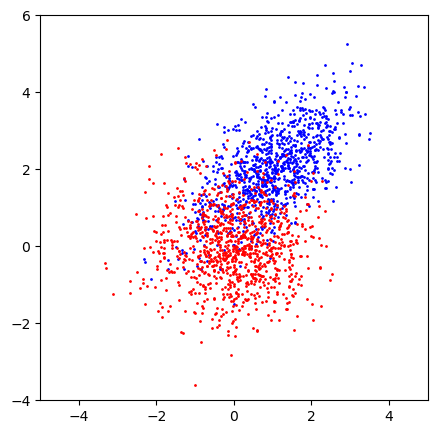

In [231]:
f, axes = plt.subplots()
f.set_figwidth(5)
f.set_figheight(5)
plt.xlim((-5,5))
plt.ylim((-4,6))

plt.scatter(x1, x2, s=1, c='blue')
plt.scatter(z1, z2, s=1, c='red')

plt.show()

We can get the conditional probability distribution using the following formula:    
$$
{\boldsymbol{\mu_{1|2}}}
=
\boldsymbol\mu_1 + \boldsymbol\Sigma_{12} \boldsymbol\Sigma_{22}^{-1}
\left(
 \mathbf{x_2} - \boldsymbol\mu_2
\right)$$     
$$ 
{\displaystyle {{\boldsymbol{\Sigma_{1|2}}}}}={\boldsymbol {\Sigma }}_{11}-{\boldsymbol {\Sigma }}_{12}{\boldsymbol {\Sigma }}_{22}^{-1}{\boldsymbol {\Sigma }}_{21}.$$      
$$
{\boldsymbol{\mu_{2|1}}}
=
\boldsymbol\mu_2 + \boldsymbol\Sigma_{21} \boldsymbol\Sigma_{11}^{-1}
\left(
 \mathbf{x_1} - \boldsymbol\mu_1
\right)$$       
$$ 
{\displaystyle {{\boldsymbol{\Sigma_{2|1}}}}}={\boldsymbol {\Sigma }}_{22}-{\boldsymbol {\Sigma }}_{21}{\boldsymbol {\Sigma }}_{11}^{-1}{\boldsymbol {\Sigma }}_{12}.$$ 

In [232]:
inv_cov = np.linalg.inv(cov)

mu_1g2 = lambda x2: mu[0] + cov[0,1] * inv_cov[1,1] * (x2 - mu[1])
var_1g2 = cov[0,0] - cov[0,1] * inv_cov[1,1] * cov[1,0]

mu_2g1 = lambda x1: mu[1] + cov[1,0] * inv_cov[0,0] * (x1 - mu[0])
var_2g1 = cov[1,1] - cov[1,0] * inv_cov[0,0] * cov[0,1]

Calculate the conditional probability distribution at $\mathrm {x_1} = a$ acts like slicing the joint distribution at $a$

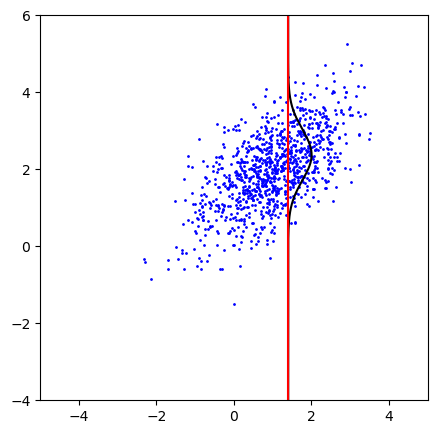

In [233]:
a = 1.4
p_2g1 = lambda x, a: 1 / ((2*np.pi * np.abs(var_2g1))**(1/2)) * np.exp(-1/2 * ((x-mu_2g1(a)))**2/np.abs(var_2g1))

x = np.linspace(-4, 6, 1000)
y = p_2g1(x, a)

f, axes = plt.subplots()
f.set_figwidth(5)
f.set_figheight(5)
plt.xlim((-5,5))
plt.ylim((-4,6))

plt.scatter(x1, x2, s=1, c='blue')
plt.plot(y+a, x, c='black')

plt.axvline(a, c='r')
plt.show()

## 2. Mercer Kernels
Kernels or Mercer kernels is another building block of a Gaussian process. They determine the shape of functions the GP will give. Basicly, a kernel encodes the simalarity information of of two input vectors. This information is useful since the model should make similar predictions given similar inputs. By definition, a Mercer kernel is any function $\mathcal {K}: \mathcal {X} \times \mathcal {X} \rightarrow \mathbb {R}^+$ such that:     
$$\sum_{i=1}^{N} \sum_{j=1}^N \mathcal {K} (\boldsymbol {\mathrm {x}}_i, \boldsymbol {\mathrm {x}}_j) c_i c_j \geq 0$$     
for any set of $N$ unique points $\boldsymbol {\mathrm {x}}_i \in \mathcal {X}$ and any $c_i \in \mathbb {R}$  

There is another formulation that can more clearly show this property: a Mercer kernel is any function $\mathcal {K}: \mathcal {X} \times \mathcal {X} \rightarrow \mathbb {R}$ that when written as a Gram matrix of the form     
$$\boldsymbol {\mathrm {K}} = \begin{pmatrix}
\mathcal {K} (\boldsymbol {\mathrm {x}}_1, \boldsymbol {\mathrm {x}}_1) & ... & \mathcal {K} (\boldsymbol {\mathrm {x}}_1, \boldsymbol {\mathrm {x}}_N) \\
 & \vdots & \\
\mathcal {K} (\boldsymbol {\mathrm {x}}_N, \boldsymbol {\mathrm {x}}_1) & ... & \mathcal {K} (\boldsymbol {\mathrm {x}}_N, \boldsymbol {\mathrm {x}}_N)
\end{pmatrix},$$
$\boldsymbol {\mathrm {K}}$ is positive definite.     

The fact that $\boldsymbol {\mathrm {K}}$ is positive definite makes it an excellent choice for the covariance matrix of a multivariate Gaussian distribution (since all positive definite matrices are invertable). The code example below shows how to sample vectors and functions from a multivariate Gaussian distribution with Mercer kernel Gram matrix covariance.


We start by picking a appropriate Mercer kernel. For demonstration purposes, we will chose the square exponential kernel or RBF kernel:    
$$\mathcal {K} (\boldsymbol {\mathrm {x}}, \boldsymbol {\mathrm {x}}') = \mathrm {exp} (- \frac{||\boldsymbol {\mathrm {x}}- \boldsymbol {\mathrm {x}}'||^2}{2 l^2})$$    
For points that are close, the rbf kernel gives values closer to 1, and for points that are far apart, the rbf kernel gives values closer to 0. There is a parameter $l$ that controls the "length" of the kernel.

In [235]:
import numpy as np
import matplotlib.pyplot as plt

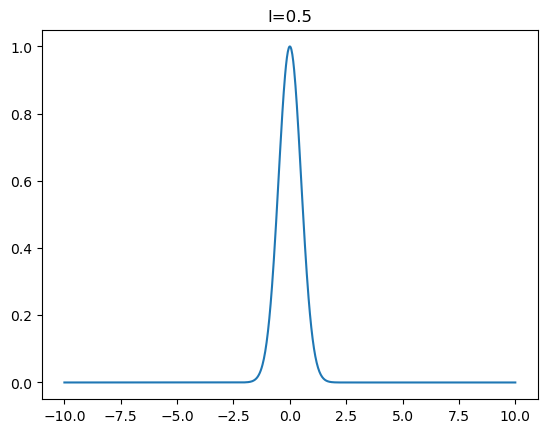

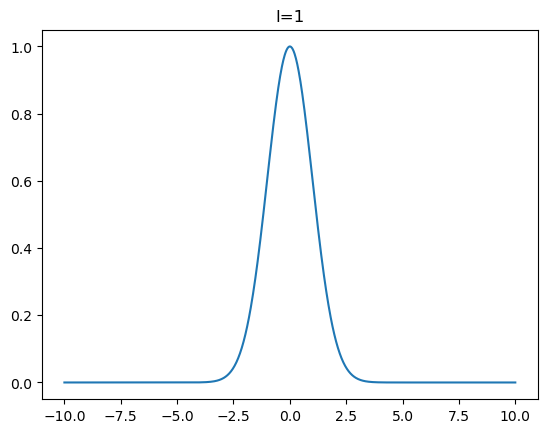

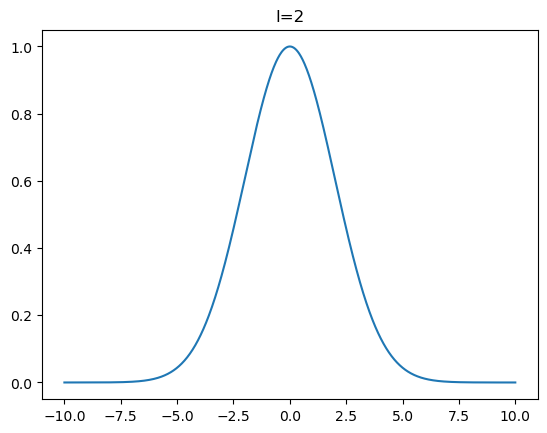

The plots above show the output of the RBF kernels given 1d inputs and a fixed x2=0


In [525]:
rbf_1d = lambda x1, x2, l: np.exp(-np.abs(x1-x2)**2 / (2*l**2))
rbf = lambda x1, x2, l: np.exp(-np.linalg.norm(x1-x2, axis=-1)**2 / (2*l**2))

x1 = np.linspace(-10, 10, 1000)
x2 = np.zeros(1000)

l = 0.5
plt.plot(x1, rbf_1d(x1, x2, l))
plt.title("l=0.5")
plt.show()

l = 1
plt.plot(x1, rbf_1d(x1, x2, l))
plt.title("l=1")
plt.show()

l = 2
plt.plot(x1, rbf_1d(x1, x2, l))
plt.title("l=2")
plt.show()

print("The plots above show the output of the RBF kernels given 1d inputs and a fixed x2=0")

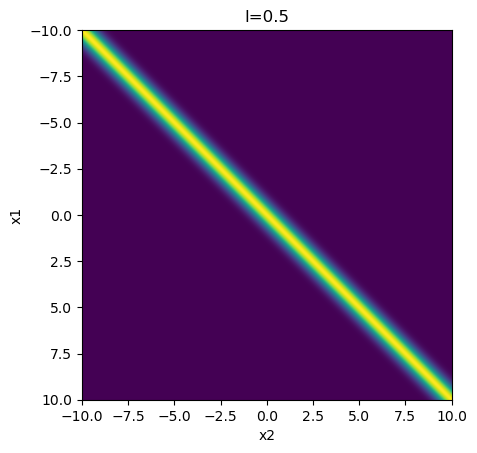

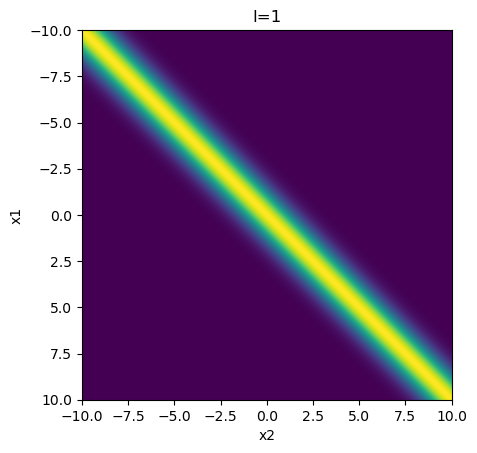

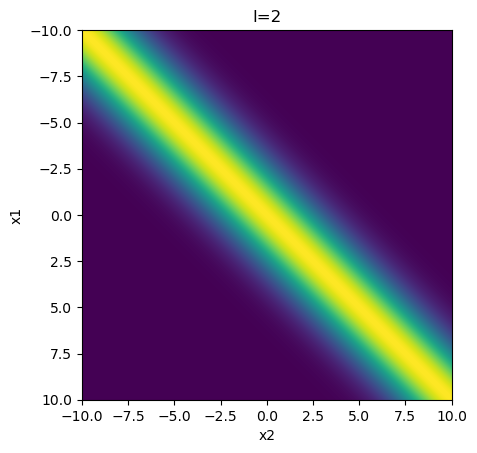

The plots above show the output of RBF kernels given x1, x2 from [-10, 10]


In [526]:
x1 = np.linspace(-10, 10, 1000)
x2 = np.linspace(-10, 10, 1000)

l = 0.5
K = np.array([rbf_1d(np.zeros(1000)+x1[i], x2, l) for i in range(1000)])
plt.imshow(K, extent=[-10,10,10,-10])
plt.title("l=0.5")
plt.xlabel("x2")
plt.ylabel("x1")
plt.show()

l = 1
K = np.array([rbf_1d(np.zeros(1000)+x1[i], x2, l) for i in range(1000)])
plt.imshow(K, extent=[-10,10,10,-10])
plt.title("l=1")
plt.xlabel("x2")
plt.ylabel("x1")
plt.show()

l = 2
K = np.array([rbf_1d(np.zeros(1000)+x1[i], x2, l) for i in range(1000)])
plt.imshow(K, extent=[-10,10,10,-10])
plt.title("l=2")
plt.xlabel("x2")
plt.ylabel("x1")
plt.show()

print("The plots above show the output of RBF kernels given x1, x2 from [-10, 10]")

Given the property that Gram matrix $$\boldsymbol {\mathrm {K}} = \begin{pmatrix}
\mathcal {K} (\boldsymbol {\mathrm {x}}_1, \boldsymbol {\mathrm {x}}_1) & ... & \mathcal {K} (\boldsymbol {\mathrm {x}}_1, \boldsymbol {\mathrm {x}}_N) \\
 & \vdots & \\
\mathcal {K} (\boldsymbol {\mathrm {x}}_N, \boldsymbol {\mathrm {x}}_1) & ... & \mathcal {K} (\boldsymbol {\mathrm {x}}_N, \boldsymbol {\mathrm {x}}_N)
\end{pmatrix}$$   
is a positive definite matrix, we can use it as a covariance matrix for a multivariate Gaussian distribution, and sample $N$ dimensional vectors from it. For the example below, we will chose $N = 10$

In [527]:
def K(l): 
    x1 = np.arange(0, 10)
    x2 = np.arange(0, 10)  # we use intergers indices from 0 to 9 instead of real number
    K = np.array([rbf_1d(np.zeros(10)+x1[i], x2, l) for i in range(10)])
    return K

In [536]:
mgd1 = lambda num: np.random.multivariate_normal(np.zeros(10), K(0.5), num)
mgd2 = lambda num: np.random.multivariate_normal(np.zeros(10), K(2), num)
mgd3 = lambda num: np.random.multivariate_normal(np.zeros(10), K(5), num)

smgd = lambda num: np.random.multivariate_normal(np.zeros(10), np.identity(10), num)

Instead of plotting 10-dimensional points, we plot the value of each scalar element of a random sample verses its indices and trace a line across every of them.

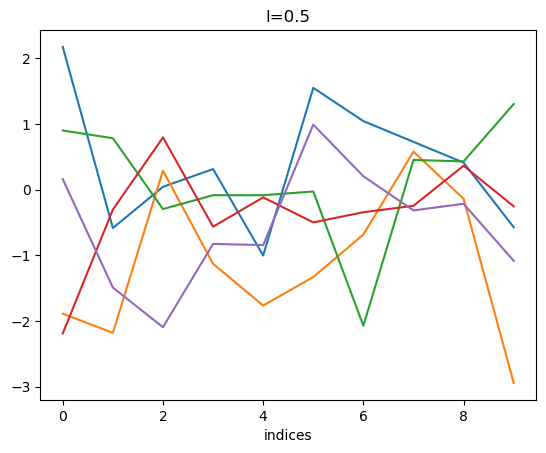

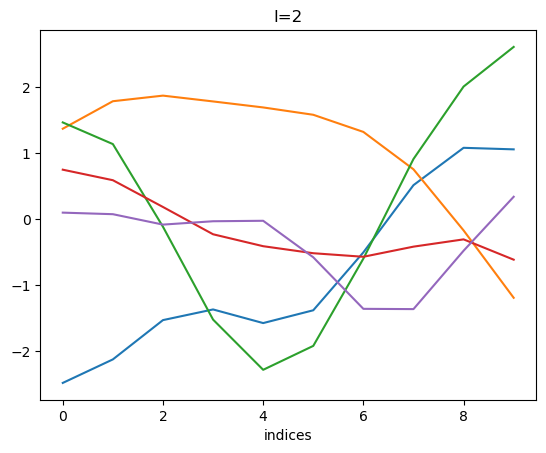

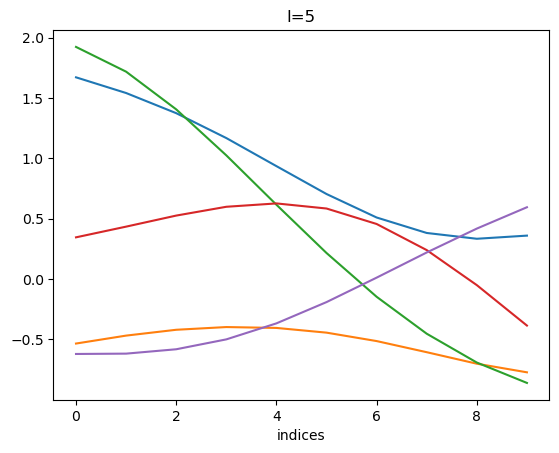

We can see that the vector curves become smoother as the kernel lengths get wider.


In [537]:
for i in range(5):
    plt.plot(mgd1(1)[0])
plt.title("l=0.5")
plt.xlabel("indices")
plt.show()

for i in range(5):
    plt.plot(mgd2(1)[0])
plt.title("l=2")
plt.xlabel("indices")
plt.show()

for i in range(5):
    plt.plot(mgd3(1)[0])
plt.title("l=5")
plt.xlabel("indices")
plt.show()

print("We can see that the vector curves become smoother as the kernel lengths get wider.")

We can also compare the vectors sampled using kernel covariance with vectors sampled from standard multivariate Gaussian.

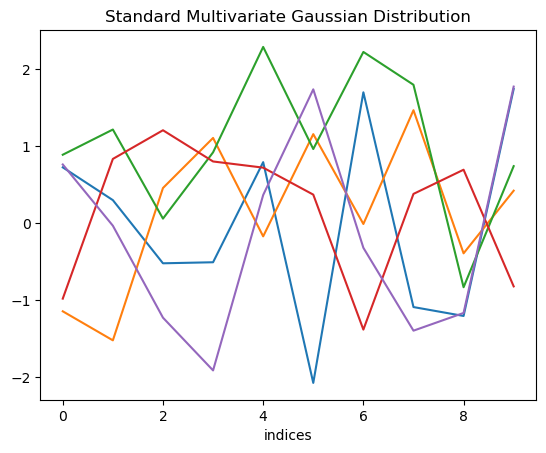

We see no sign of smoothness but pure randomness


In [538]:
for i in range(5):
    plt.plot(smgd(1)[0])
plt.title("Standard Multivariate Gaussian Distribution")
plt.xlabel("indices")
plt.show()

print("We see no sign of smoothness but pure randomness")

We can increase the dimension to make the curves smoother. For example $N = 100$

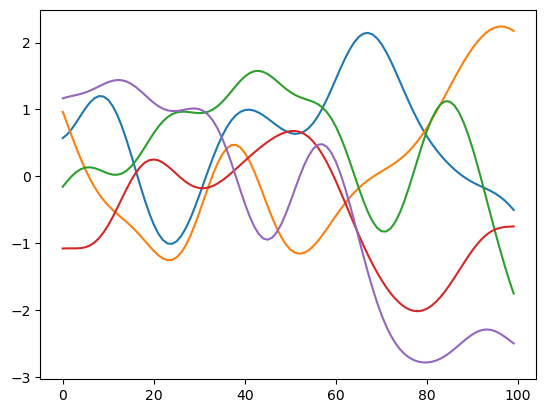

In [531]:
def rbf_K(l): 
    x1 = np.arange(0, 100)
    x2 = np.arange(0, 100)  # we use intergers indices from 0 to 9 instead of real number
    K = np.array([rbf_1d(np.zeros(100)+x1[i], x2, l) for i in range(100)])
    return K

rbf_mgd_100 = lambda num, l: np.random.multivariate_normal(np.zeros(100), rbf_K(l), num)

for i in range(5):
    plt.plot(rbf_mgd_100(1, 10)[0])
plt.show()

We can use different kernels to get curves of different shape. For example, the Matern kernel    
$$\mathcal {K} (r; \nu, l) = \frac{2^{1-\nu}}{\Gamma(\nu)} \left(\frac {\sqrt {2\nu} r}{l}\right)^\nu K_\nu \left(\frac {\sqrt {2\nu} r}{l}\right),$$    
where $r = ||\boldsymbol {\mathrm {x}} - \boldsymbol {\mathrm {x}}'||$, and $K_\nu(\cdot)$ represents the modified Bessel function, gives curves that are continuous but not very smooth. And the periodic kernel    
$$\mathcal {K} (r; l, p) = \mathrm {exp}\left( -\frac{2}{l^2} \mathrm {sin}^2 \left( \pi \frac{r}{p}\right)\right)$$ gives periodic curves with period controled by parameter $p$

/var/folders/y3/062pz2h97vj3b00836tpzmqc0000gn/T/ipykernel_49822/1338714546.py:14: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  martern_mgd = lambda num, nu, l: np.random.multivariate_normal(np.zeros(100), martern_K(nu, l), num)


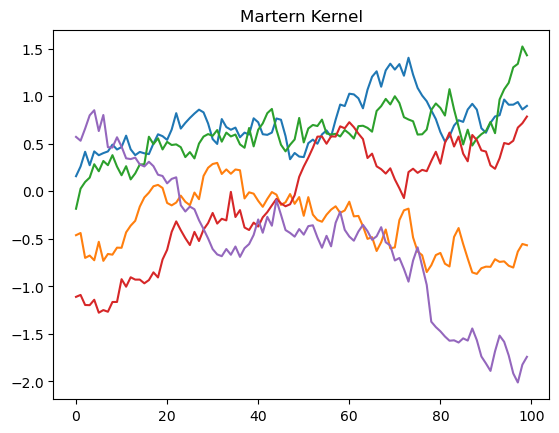

In [532]:
import scipy
matern = lambda x1, x2, nu, l: 2**(1-nu)/scipy.special.gamma(nu) * \
                               (np.sqrt(2*nu)*np.linalg.norm(x1-x2, axis=-1)/l)**nu * \
                               scipy.special.iv(nu, np.sqrt(2*nu)*np.linalg.norm(x1-x2, axis=-1)/l)
matern_1d = lambda x1, x2, nu, l: 2**(1-nu)/scipy.special.gamma(nu) * \
                                  (np.sqrt(2*nu)*np.abs(x1-x2)/l)**nu * \
                                  scipy.special.iv(nu, np.sqrt(2*nu)*np.abs(x1-x2)/l)
def martern_K(nu, l): 
    x1 = np.arange(0, 100)
    x2 = np.arange(0, 100)  # we use intergers indices from 0 to 9 instead of real number
    K = np.array([matern_1d(np.zeros(100)+x1[i], x2, nu, l) for i in range(100)])
    return K

martern_mgd = lambda num, nu, l: np.random.multivariate_normal(np.zeros(100), martern_K(nu, l), num)

for i in range(5):
    plt.plot(martern_mgd(1, 0.5, 100)[0])
plt.title("Martern Kernel")
plt.show()

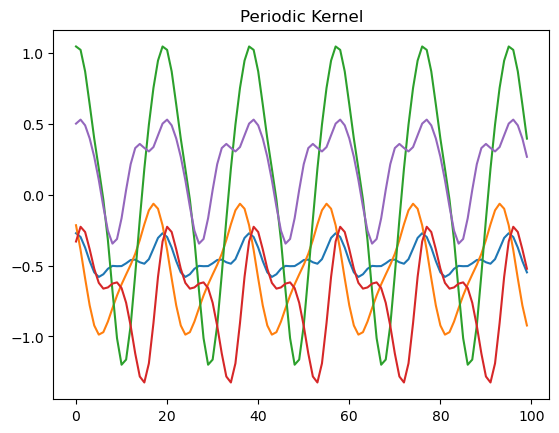

In [533]:
periodic = lambda x1, x2, l, p: np.exp(-2/l**2 * np.sin(np.pi * np.linalg.norm(x1-x2, axis=-1)/p)**2)
periodic_1d = lambda x1, x2, l, p: np.exp(-2/l**2 * np.sin(np.pi * np.abs(x1-x2)/p)**2)

def periodic_K(l, p): 
    x1 = np.arange(0, 100)
    x2 = np.arange(0, 100)  # we use intergers indices from 0 to 9 instead of real number
    K = np.array([periodic_1d(np.zeros(100)+x1[i], x2, l, p) for i in range(100)])
    return K

periodic_mgd = lambda num, l, p: np.random.multivariate_normal(np.zeros(100), periodic_K(l, p), num)

for i in range(5):
    plt.plot(periodic_mgd(1, 2, 0.95)[0])
plt.title("Periodic Kernel")
plt.show()

There are certain ways to combine exsiting kernels to make new kernels. One can create kernels using any of the following methods:     
$$\mathcal {K} (\boldsymbol{\mathrm{x}}, \boldsymbol{\mathrm{x}}') = c \mathcal {K}_1 (\boldsymbol{\mathrm{x}}, \boldsymbol{\mathrm{x}}') \text{ for any } c \in \mathbb{R}^+$$     
$$\mathcal {K} (\boldsymbol{\mathrm{x}}, \boldsymbol{\mathrm{x}}') = f(\boldsymbol{\mathrm{x}})\mathcal {K}_1 (\boldsymbol{\mathrm{x}}, \boldsymbol{\mathrm{x}}')f(\boldsymbol{\mathrm{x}}')\text{ for any function }f$$      
$$\mathcal {K} (\boldsymbol{\mathrm{x}}, \boldsymbol{\mathrm{x}}') = q(\mathcal {K}_1 (\boldsymbol{\mathrm{x}}, \boldsymbol{\mathrm{x}}')) \text{ for any polynomial }q\text{ with nonneg. coef.}$$      
$$\mathcal {K} (\boldsymbol{\mathrm{x}}, \boldsymbol{\mathrm{x}}') = \mathrm{exp}(\mathcal {K}_1 (\boldsymbol{\mathrm{x}}, \boldsymbol{\mathrm{x}}'))$$     
$$\mathcal {K} (\boldsymbol{\mathrm{x}}, \boldsymbol{\mathrm{x}}') = \boldsymbol{\mathrm{x}}^{\mathrm{T}} \boldsymbol{\mathrm{A}} \boldsymbol{\mathrm{x}}' \text{ for any semi-positive definite matrix } \boldsymbol{\mathrm{A}}$$   
$$\mathcal {K} (\boldsymbol{\mathrm{x}}, \boldsymbol{\mathrm{x}}') = \mathcal {K}_1 (\boldsymbol{\mathrm{x}}, \boldsymbol{\mathrm{x}}') + \mathcal {K}_2 (\boldsymbol{\mathrm{x}}, \boldsymbol{\mathrm{x}}')$$    
$$\mathcal {K} (\boldsymbol{\mathrm{x}}, \boldsymbol{\mathrm{x}}') = \mathcal {K}_1 (\boldsymbol{\mathrm{x}}, \boldsymbol{\mathrm{x}}')\times \mathcal {K}_2 (\boldsymbol{\mathrm{x}}, \boldsymbol{\mathrm{x}}')$$   
In the follwing example, we will be creating a valid kernel by adding a periodic kernel with a RBF kernel.

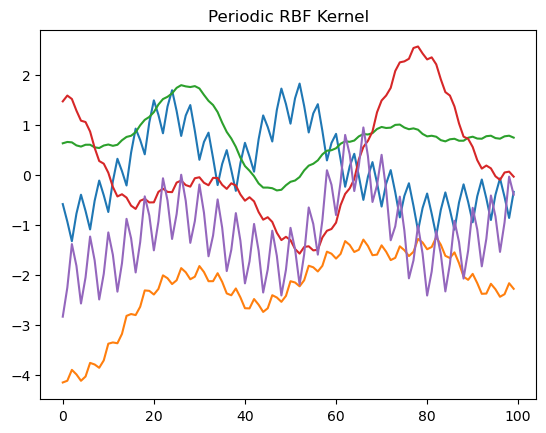

In [534]:
periodic = lambda x1, x2, l, p: np.exp(-2/l**2 * np.sin(np.pi * np.linalg.norm(x1-x2, axis=-1)/p)**2)
periodic_1d = lambda x1, x2, l, p: np.exp(-2/l**2 * np.sin(np.pi * np.abs(x1-x2)/p)**2)
rbf = lambda x1, x2, l: np.exp(-np.linalg.norm(x1-x2, axis=-1)**2 / (2*l**2))
rbf_1d = lambda x1, x2, l: np.exp(-np.abs(x1-x2)**2 / (2*l**2))

periodicRBF = lambda x1, x2, l_r, l_p, p: rbf(x1, x2, l_r) + periodic(x1, x2, l_p, p)
periodicRBF_1d = lambda x1, x2, l_r, l_p, p: rbf_1d(x1, x2, l_r) + periodic_1d(x1, x2, l_p, p)

def periodicRBF_K(l_r, l_p, p): 
    x1 = np.arange(0, 100)
    x2 = np.arange(0, 100)  # we use intergers indices from 0 to 9 instead of real number
    K = np.array([periodicRBF_1d(np.zeros(100)+x1[i], x2, l_r, l_p, p) for i in range(100)])
    return K

periodicRBF_mgd = lambda num, l_r, l_p, p: np.random.multivariate_normal(np.zeros(100), periodicRBF_K(l_r, l_p, p), num)

for i in range(5):
    plt.plot(periodicRBF_mgd(1, 10, 5, 0.8)[0])
plt.title("Periodic RBF Kernel")
plt.show()

Theoretically, if we sample from a multivariate Gaussian distribution with infinite dimensions, we would be able to sample functions instead of vectors. This is a key concept behind Gaussian process regression. However, due to some numerical instability (e.g. $|\Sigma| \rightarrow0 $ ), another approach is used in a real GP regression

## Putting Everything Together
In the previous section, we see how functions can be sampled from multivariate Gaussian distribution. This sampling of functions can already be considered as a Gaussian process, folowing its definition. However, the main purpose of GP is to do regressions instead of generating random curves. Therefore, in this final section, we will be looking at how to fit a GP to data, and do prediction given an input.        
  
The **key assumption** of GP regression is that the function values (predictions) at a set of $M > 0$ inputs, $\boldsymbol {f} = \left[ f(\boldsymbol{\mathrm{x}}_1),...,f(\boldsymbol{\mathrm{x}}_{M})\right]$ is jointly Gaussian, with mean $\boldsymbol{\mu} = \left[ m(\boldsymbol{\mathrm{x}}_1),...,m(\boldsymbol{\mathrm{x}}_{M}) \right]$ and covariance $\boldsymbol{\mathrm{\Sigma}}_{ij} = \mathcal{K}(\boldsymbol{\mathrm{x}}_i, \boldsymbol{\mathrm{x}}_j)$, where $m(\cdot)$ is a mean function and $\mathcal{K}(\cdot)$ is a Mercer kernel.     
     
Recall the **rule of conditoning Gaussian**: If    
$$
{\mathbf  {x}}={\begin{bmatrix}{\mathbf  {x}}_{1}\\{\mathbf  {x}}_{2}\end{bmatrix}} \sim \mathcal{N}(\boldsymbol {\mu}, \boldsymbol {\Sigma}){\text{ with sizes }}{\begin{bmatrix}q\times 1\\(N-q)\times 1\end{bmatrix}}$$   
and accordingly $\boldsymbol {\mu}$ and $\boldsymbol {\Sigma}$ are partitioned as follows:  $$
\boldsymbol\mu
=
\begin{bmatrix}
 \boldsymbol\mu_1 \\
 \boldsymbol\mu_2
\end{bmatrix}
\text{ with sizes }\begin{bmatrix} q \times 1 \\ (N-q) \times 1 \end{bmatrix}$$    
$$
\boldsymbol\Sigma
=
\begin{bmatrix}
 \boldsymbol\Sigma_{11} & \boldsymbol\Sigma_{12} \\
 \boldsymbol\Sigma_{21} & \boldsymbol\Sigma_{22}
\end{bmatrix}
\text{ with sizes }\begin{bmatrix} q \times q & q \times (N-q) \\ (N-q) \times q & (N-q) \times (N-q) \end{bmatrix}$$    
then the distribution of $\mathrm {x_2}$ conditional on $\mathrm {x_1}$ is multivariate Gaussian $\mathrm {x_2}|\mathrm {x_1} \ \sim \ {\mathcal {N}}({\boldsymbol {\mu_{2|1}}},\,{\boldsymbol {\Sigma_{2|1}}})$ where     
$$
{\boldsymbol{\mu_{2|1}}}
=
\boldsymbol\mu_2 + \boldsymbol\Sigma_{21} \boldsymbol\Sigma_{11}^{-1}
\left(
 \mathbf{x_1} - \boldsymbol\mu_1
\right)$$       
$$ 
{\displaystyle {{\boldsymbol{\Sigma_{2|1}}}}}={\boldsymbol {\Sigma }}_{22}-{\boldsymbol {\Sigma }}_{21}{\boldsymbol {\Sigma }}_{11}^{-1}{\boldsymbol {\Sigma }}_{12}.$$       
     
Combining the **key assumption** and **rule of conditoning Gaussian**, we yield a formulation for GP regression:    
For training set $X$ with size $N$ of inputs $\boldsymbol{\mathrm{x}}_i$, and test set $X_*$ with size $N_*$ of inputs $\boldsymbol{\mathrm{x}}^*_i$ (their function values denoted $\boldsymbol{f}_{X}$ and $\boldsymbol{f}_{*}$)
$$\text{If} \begin{bmatrix}
\boldsymbol{f}_{X} \\
\boldsymbol{f}_{*}
\end{bmatrix} \sim \mathcal{N} \left(\begin{bmatrix}
\boldsymbol \mu_{X} \\
\boldsymbol \mu_{X_*}
\end{bmatrix}, \begin{bmatrix}
\boldsymbol{\mathrm{K}}_{X,X} & \boldsymbol{\mathrm{K}}_{X,*} \\
\boldsymbol{\mathrm{K}}_{X,*}^\mathrm{T} & \boldsymbol{\mathrm{K}}_{*,*} \\
\end{bmatrix} \right),$$     
where $\boldsymbol \mu_{X} = \left[ m(\boldsymbol{\mathrm{x}}_1),...,m(\boldsymbol{\mathrm{x}}_{N}) \right]$, $\boldsymbol \mu_{X_*} = \left[ m(\boldsymbol{\mathrm{x}}^*_1),...,m(\boldsymbol{\mathrm{x}}^*_{N_*}) \right]$, 
$\boldsymbol{\mathrm{K}}_{X,X} = \begin{bmatrix}
\mathcal{K}(\boldsymbol{\mathrm{x}}_1, \boldsymbol{\mathrm{x}}_1) & ... & \mathcal{K}(\boldsymbol{\mathrm{x}}_1, \boldsymbol{\mathrm{x}}_N) \\
 & \vdots & \\
\mathcal{K}(\boldsymbol{\mathrm{x}}_N, \boldsymbol{\mathrm{x}}_1) & ... & \mathcal{K}(\boldsymbol{\mathrm{x}}_N, \boldsymbol{\mathrm{x}}_N)
\end{bmatrix}$, 
$\boldsymbol{\mathrm{K}}_{X,*} = \begin{bmatrix}
\mathcal{K}(\boldsymbol{\mathrm{x}}_1, \boldsymbol{\mathrm{x}}^*_1) & ... & \mathcal{K}(\boldsymbol{\mathrm{x}}_1, \boldsymbol{\mathrm{x}}^*_{N_*}) \\
 & \vdots & \\
\mathcal{K}(\boldsymbol{\mathrm{x}}_N, \boldsymbol{\mathrm{x}}^*_1) & ... & \mathcal{K}(\boldsymbol{\mathrm{x}}_N, \boldsymbol{\mathrm{x}}^*_{N_*})
\end{bmatrix}$, 
$\boldsymbol{\mathrm{K}}_{*,*} = \begin{bmatrix}
\mathcal{K}(\boldsymbol{\mathrm{x}}^*_1, \boldsymbol{\mathrm{x}}^*_1) & ... & \mathcal{K}(\boldsymbol{\mathrm{x}}^*_1, \boldsymbol{\mathrm{x}}^*_{N_*}) \\
 & \vdots & \\
\mathcal{K}(\boldsymbol{\mathrm{x}}^*_{N_*}, \boldsymbol{\mathrm{x}}^*_1) & ... & \mathcal{K}(\boldsymbol{\mathrm{x}}^*_{N_*}, \boldsymbol{\mathrm{x}}^*_{N_*})
\end{bmatrix}$      
$$\text {then } P(\boldsymbol{f}_{*} | X_* , X, \boldsymbol{f}_{X}) = \mathcal{N}(\boldsymbol{\mathrm{\mu}}_*, \boldsymbol{\mathrm{\Sigma}}_*),\\
\text{where } \boldsymbol{\mathrm{\mu}}_* = \boldsymbol \mu_{X_*} + \boldsymbol{\mathrm{K}}^\mathrm{T}_{X,*} \boldsymbol{\mathrm{K}}^{-1}_{X,X} \left( \boldsymbol{f}_{X}-\boldsymbol \mu_{X} \right)\\
\boldsymbol{\mathrm{\Sigma}}_* = \boldsymbol{\mathrm{K}}_{*,*} - \boldsymbol{\mathrm{K}}^\mathrm{T}_{X,*} \boldsymbol{\mathrm{K}}^{-1}_{X,X}\boldsymbol{\mathrm{K}}_{X,*}  $$      
For simplicity, we normally let $m(\cdot) = \boldsymbol{0}$. But in algrorithms like Kriging, $m(\cdot)$ can be a polynomial.
    
The following code is an implementation of a GP regression assuming there is no noise in observation.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

In [6]:
class GaussianProcess:
    def __init__(self, input_dim, kernel, mean_function=lambda x: np.zeros(x.shape[0])):
        self.kernel = kernel
        self.dim = input_dim
        self.mean_function = mean_function
        self.mean = None
        self.cov = None
        self.X = None
        self.Y = None
        
        try:
            kernel(np.array([[1,1], [2,2]]), np.array([[2,2], [1,1]]))
        except:
            raise RuntimeError("Invalid Mercer kernel")
        try:
            kernel(np.array([[1,1], [2,2]]), np.array([[2,2], [1,1]]))
        except:
            raise RuntimeError("Invalid mean function")
    
    
    def fit(self, X, Y):
        self.X, self.Y = X, Y
        self.cov = []
        for i in range(X.shape[0]):
            x1 = np.repeat(np.expand_dims(X[i], axis=0), X.shape[0], axis=0)
            self.cov.append(self.kernel(x1, X))
        self.cov = np.array(self.cov)
        self.mean = self.mean_function(X)
        
    def predict(self, x):
        test_mean = self.mean_function(np.expand_dims(x, axis=0))
        x1 = np.repeat(np.expand_dims(x, axis=0), self.X.shape[0], axis=0)
        cov_train2test = self.kernel(x1, self.X)
        cov_test2test = self.kernel(x, x)
        
        predicted_mean = test_mean + np.dot(cov_train2test, np.matmul(np.linalg.inv(self.cov), (self.Y-self.mean)))
        predicted_var = cov_test2test - np.dot(cov_train2test, np.matmul(np.linalg.inv(self.cov), cov_train2test))
        return predicted_mean, predicted_var

In [41]:
rbf = lambda x1, x2, l: np.exp(-np.linalg.norm(x1-x2, axis=-1)**2 / (2*l**2))
kernel = lambda x1, x2: rbf(x1, x2, l=1.1)
model = GaussianProcess(1, kernel=kernel)

In [42]:
function2predict = lambda x: np.sin(np.cos(0.6*x**2) + 1.5*x) / 1000

train_data_res = 8
x_train = np.expand_dims(np.linspace(-3, 3, train_data_res), axis=1)
y_train = np.reshape(function2predict(x_train), -1)

In [43]:
model.fit(x_train, y_train)

In [44]:
x_test = np.expand_dims(np.linspace(-3, 3, 100), axis=1)
y_test = []
y_var = []
for x in x_test:
    mean, var = model.predict(x)
    y_test.append(float(mean))
    y_var.append(float(var))

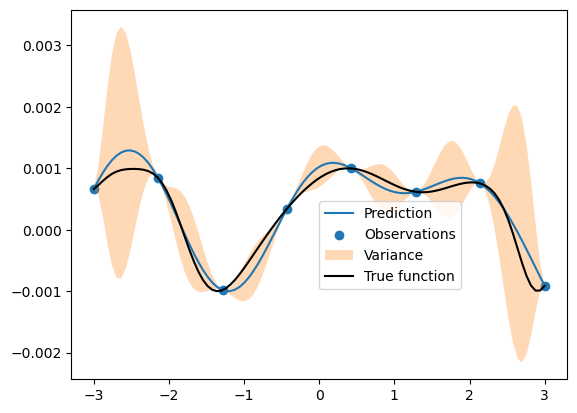

In [45]:
plt.plot(np.reshape(x_test, -1), y_test)
plt.scatter(np.reshape(x_train, -1), y_train)
plt.fill_between(np.reshape(x_test, -1), np.array(y_test)+np.array(y_var), np.array(y_test)-np.array(y_var), alpha=0.3)
plt.plot(np.linspace(-3, 3, 100), function2predict(np.linspace(-3, 3, 100)), c='black')
# plt.ylim(-1.3, 1.3)
plt.legend(['Prediction', 'Observations', 'Variance', 'True function'], bbox_to_anchor =(0.80, 0.5), ncol = 1) 
plt.show()

### Create an animation

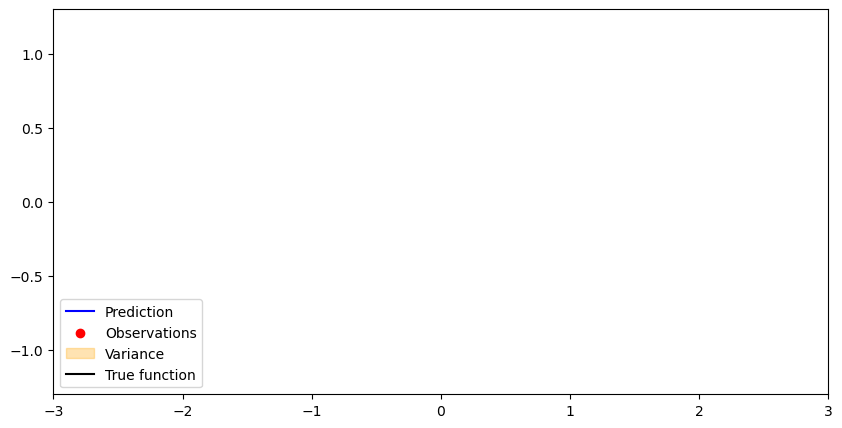

In [172]:
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,1,1) 
ax1.set_xlim(( -3, 3))            
ax1.set_ylim((-1.3, 1.3))
line_prediction, = ax1.plot([], [], c='b')
points_observation = ax1.scatter([], [], c='r')
area_variance, = ax1.fill([], [] ,color='orange', alpha=0.3)
line_true, = ax1.plot([], [], c='black')
legend = ax1.legend(['Prediction','Observations', 'Variance', 'True function'], loc=3)
txt_title = ax1.set_title('')

In [173]:
rbf = lambda x1, x2, l: np.exp(-np.linalg.norm(x1-x2, axis=-1)**2 / (2*l**2))
# linear = lambda x1, x2, c: c*np.linalg.norm(x1-x2, axis=-1)
kernel = lambda x1, x2: rbf(x1, x2, l=0.5)
model = GaussianProcess(1, kernel=kernel)

function2predict = lambda x: np.sin(np.cos(0.6*x**2) + 1.5*x)

def drawframe(n):
    ax1 = plt.subplot(1,1,1)   
    
    x_train = np.expand_dims(np.linspace(-3, 3, 2**n+1), axis=1)
    y_train = np.reshape(function2predict(x_train), -1)
    
    model.fit(x_train, y_train)
    
    x_test = np.expand_dims(np.linspace(-3, 3, 100), axis=1)
    y_predict = []
    y_var = []
    for x in x_test:
        mean, var = model.predict(x)
        y_predict.append(float(mean))
        y_var.append(float(var))
    y_predict = np.array(y_predict)
    y_var = np.array(y_var)

    line_prediction.set_data(np.reshape(x_test, -1), y_predict)
    cord_observation = [[np.reshape(x_train, -1)[i], y_train[i]] for i in range(len(y_train))]
    points_observation.set_offsets(cord_observation)
    vertices_above = [[np.reshape(x_test, -1)[i], (np.array(y_predict)+np.array(y_var))[i]] for i in range(len(y_test))]
    vertices_below = [[np.reshape(x_test, -1)[i], (np.array(y_predict)-np.array(y_var))[i]] for i in range(len(y_test))]
    vertices_below = [vertices_below[len(vertices_below)-i-1] for i in range(len(vertices_below))]
    vertices = np.concatenate((vertices_above, vertices_below))
    area_variance.set_xy(vertices)
    line_true.set_data(np.linspace(-3, 3, 100), function2predict(np.linspace(-3, 3, 100)))
    txt_title.set_text(f'{2**n+1} observations')
    return (line_prediction,points_observation, area_variance, line_true)

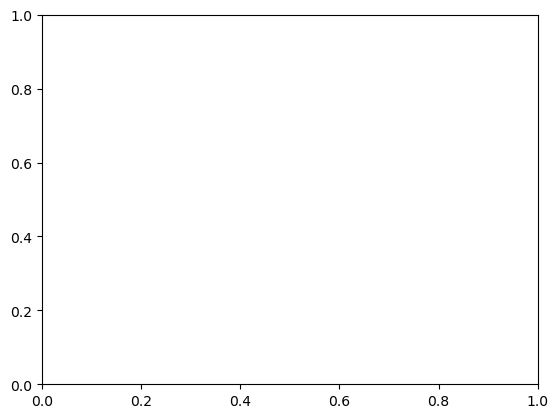

In [174]:
from matplotlib import animation
from IPython.display import HTML
anim = animation.FuncAnimation(fig, drawframe, frames=6, interval=3000, blit=False);
HTML(anim.to_html5_video())

## 3D Gaussian process
Notice that the input to the Gaussian process can be vectors of any dimension. Thus, it is not nessary for the inputs to be scalars. In the following section, a GP regression which generated a 3D surface will be shown.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import scipy

class GaussianProcess:
    def __init__(self, input_dim, kernel, mean_function=lambda x: np.zeros(x.shape[0])):
        self.kernel = kernel
        self.dim = input_dim
        self.mean_function = mean_function
        self.mean = None
        self.cov = None
        self.X = None
        self.Y = None
        
        try:
            kernel(np.array([[1,1], [2,2]]), np.array([[2,2], [1,1]]))
        except:
            raise RuntimeError("Invalid Mercer kernel")
        try:
            kernel(np.array([[1,1], [2,2]]), np.array([[2,2], [1,1]]))
        except:
            raise RuntimeError("Invalid mean function")
    
    
    def fit(self, X, Y):
        self.X, self.Y = X, Y
        self.cov = []
        for i in range(X.shape[0]):
            x1 = np.repeat(np.expand_dims(X[i], axis=0), X.shape[0], axis=0)
            self.cov.append(self.kernel(x1, X))
        self.cov = np.array(self.cov)
        self.mean = self.mean_function(X)
        
    def predict(self, x):
        test_mean = self.mean_function(np.expand_dims(x, axis=0))
        x1 = np.repeat(np.expand_dims(x, axis=0), self.X.shape[0], axis=0)
        cov_train2test = self.kernel(x1, self.X)
        cov_test2test = self.kernel(x, x)
        
        predicted_mean = test_mean + np.dot(cov_train2test, np.matmul(np.linalg.inv(self.cov), (self.Y-self.mean)))
        predicted_var = cov_test2test - np.dot(cov_train2test, np.matmul(np.linalg.inv(self.cov), cov_train2test))
        return predicted_mean, predicted_var

In [46]:
rbf = lambda x1, x2, l: np.exp(-np.linalg.norm(x1-x2, axis=-1)**2 / (2*l**2))
kernel = lambda x1, x2: rbf(x1, x2, l=0.75)
model = GaussianProcess(2, kernel=kernel)

In [52]:
function2predict = lambda x, y: np.cos(np.sqrt((0.75*x)**2+0.3*(0.67*y)**2))
train_data_res = 10

x_train_x = np.linspace(-4, 4, train_data_res)
x_train_y = np.linspace(-4, 4, train_data_res)
x_train_x, x_train_y = np.meshgrid(x_train_x, x_train_y)
z = function2predict(x_train_x, x_train_y)

x_train = []
for i in range(x_train_x.shape[0]):
    x_train.append([[x_train_x[i][j], x_train_y[i][j]] for j in range(x_train_x.shape[1])])
x_train = np.reshape(x_train, (-1, 2))
y_train = np.reshape(z, -1)

In [54]:
model.fit(x_train, y_train)

In [55]:
x_test_x = np.linspace(-3, 3, 100)
x_test_y = np.linspace(-3, 3, 100)
x_test_x, x_test_y = np.meshgrid(x_test_x, x_test_y)

x_test = []
for i in range(x_test_x.shape[0]):
    x_test.append([[x_test_x[i][j], x_test_y[i][j]] for j in range(x_test_x.shape[1])])
x_test = np.reshape(x_test, (-1, 2))

In [56]:
y_predict = []
for x in x_test:
    mean, var = model.predict(x)
    y_predict.append(float(mean))
y_predict = np.reshape(y_predict, (100, 100))

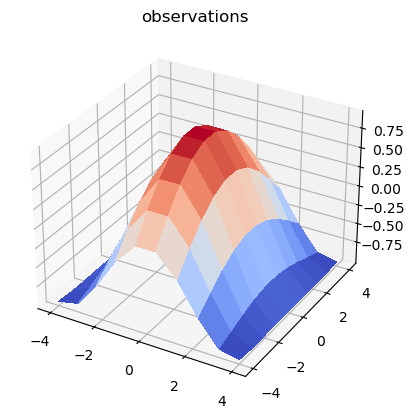

In [60]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x_train_x, x_train_y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title("observations")

plt.show()

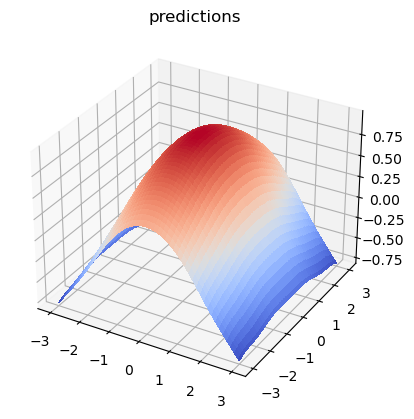

In [61]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x_test_x, x_test_y, y_predict, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title("predictions")

plt.show()

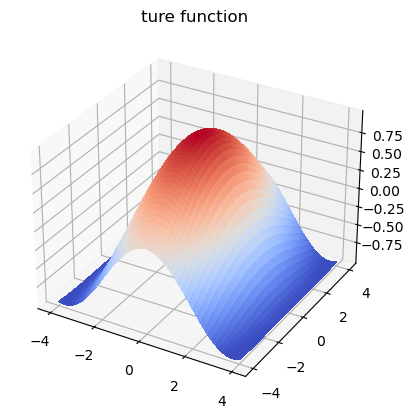

In [62]:
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
x, y = np.meshgrid(x, y)
z_true = function2predict(x, y)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, y, z_true, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title("ture function")

plt.show()